### Emprendimiento de mujeres y fuerza laboral

Los datos se obtuvieron del informe Women Entrepreneurship Index y Global Entrepreneurship Index publicado en 2015.

Históricamente, el espíritu empresarial estuvo dominado principalmente por hombres, pero en el siglo XXI la dinámica está cambiando. El mundo está viendo cada vez más emprendedoras exitosas.

Este conjunto de datos cubre datos de 50 países del mundo y cubre información como tasas de inflación, moneda e índice de emprendimiento en general para mujeres.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset3.csv",delimiter=";")
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


Data que nos interesa 

- **Country:** País de donde procede el dato
- **Level ov developed:** Es un páis desarrollado o en desarrollo
- **European union membership**: Es un pais que se encuentra como miembro de la union europea
- **Currency:** Moneda del páis
- **Women Entrepreneurship Index:** Mide el desarrollo global de emprendedoras de alto potencial, definidas como “mujeres que poseen y operan negocios innovadores, en expansión de mercado y orientados a la exportación
- **Entrepreneurship Index** índice anual que mide la salud de los ecosistemas de emprendimiento
- **Female Labor Force Participation Rate** Tasa de participación femenina en la fuerza laboral 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                51 non-null     object 
 1   Level of development                   51 non-null     object 
 2   European Union Membership              51 non-null     object 
 3   Currency                               51 non-null     object 
 4   Women Entrepreneurship Index           51 non-null     float64
 5   Entrepreneurship Index                 51 non-null     float64
 6   Inflation rate                         51 non-null     float64
 7   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), object(4)
memory usage: 3.3+ KB


In [ ]:
data.Country.value_counts()

Turkey                    1
Hungary                   1
Ghana                     1
Norway                    1
Australia                 1
Denmark                   1
Jamaica                   1
El Salvador               1
Estonia                   1
China                     1
Saudi Arabia              1
Poland                    1
Sweden                    1
Italy                     1
Netherlands               1
Singapore                 1
Greece                    1
India                     1
Tunisia                   1
Ecuador                   1
Austria                   1
Egypt                     1
Uruguay                   1
Croatia                   1
Panama                    1
Germany                   1
Belgium                   1
Finland                   1
Lithuania                 1
Ireland                   1
Japan                     1
Bosnia and Herzegovina    1
Costa Rica                1
Malaysia                  1
Latvia                    1
Iceland             

In [ ]:
len(data['Country'].unique())

51

In [ ]:
data['Level of development'].value_counts()

Developed     27
Developing    24
Name: Level of development, dtype: int64

In [ ]:
data['European Union Membership'].value_counts()

Not Member    31
Member        20
Name: European Union Membership, dtype: int64

In [ ]:
data['Currency'].value_counts()

National Currency    36
Euro                 15
Name: Currency, dtype: int64

### Importing Country Codes
plotly requires country's alpha 3 codes for locating data in the world map. So we have to manually import from Github

In [ ]:
import requests
import io

In [ ]:
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"

In [ ]:
s=requests.get(url).content
codes = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
codes = codes[['name','alpha-3']]
codes.columns = ['Country','Code']
codes.head()


,Country,Code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [ ]:
data = pd.merge(data,codes,on = 'Country')
data.head()

,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Code
0,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1,AUT
1,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0,BEL
2,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5,EST
3,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7,FIN
4,France,Developed,Member,Euro,68.8,67.3,0.00,60.6,FRA


### Estadisticas

In [ ]:
data.describe()

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,47.000000,47.000000,47.000000,47.000000
mean,48.504255,47.731915,2.325106,57.871702
std,14.449958,16.088871,5.241652,14.147188
min,25.300000,24.800000,-2.250000,13.000000
25%,36.750000,32.150000,-0.500000,55.800000
50%,49.900000,45.400000,0.500000,60.800000
75%,61.700000,65.400000,2.500000,66.950000
max,74.800000,77.600000,26.500000,82.300000


### Correlaciones de los datos

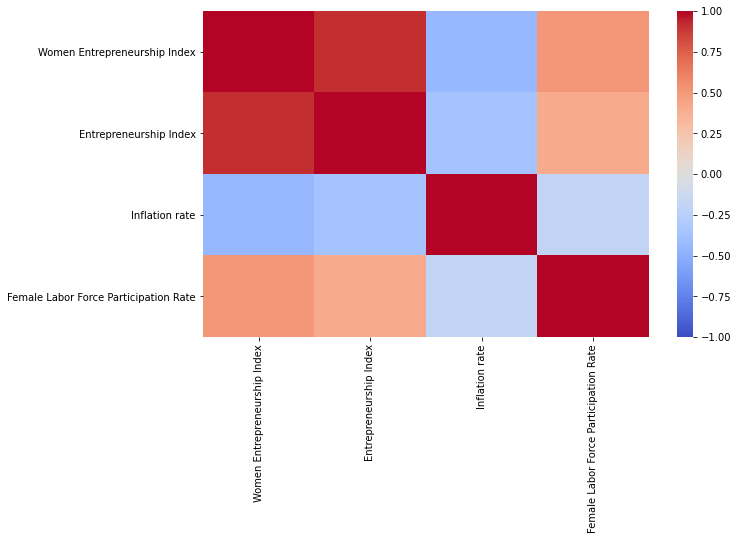

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),vmax = 1,vmin = -1,cmap = 'coolwarm');

### Woman Entrepreneurship Indices in the World


In [ ]:
fig = px.choropleth(data,locations='Code',color = 'Women Entrepreneurship Index',hover_name='Country',
                    hover_data = ['Level of development', 'Entrepreneurship Index',"Women Entrepreneurship Index",'Inflation rate','Female Labor Force Participation Rate'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Effect of Inflation on Entrepreneurship

In [ ]:
px.scatter(data, x ='Inflation rate', y = 'Entrepreneurship Index')


Con una disminución en la inflación, el índice de emprendimiento aumenta

### Índice de emprendimiento femenino frente al índice de emprendimiento

In [ ]:
px.scatter(data, x ='Women Entrepreneurship Index', y = 'Entrepreneurship Index')

A medida que aumenta el índice de emprendimiento, el índice de emprendimiento femenino tiende a aumentar

### Índice de emprendimiento femenino vs tasa de participación femenina en la fuerza laboral

In [ ]:
px.scatter(data, x ='Women Entrepreneurship Index', y = 'Female Labor Force Participation Rate')

Similar al índice de emprendimiento, la tasa de participación femenina en la fuerza laboral también aumenta con el índice de emprendimiento de mujeres, pero de manera menos pronunciada

### Países desarrollados vs países en desarrollo

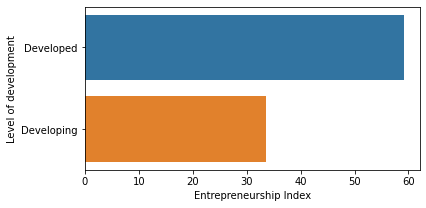

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(y = 'Level of development', x = 'Entrepreneurship Index', data = data,ci = None);

Una observación obvia, los países desarrollados tienen una mejor cultura empresarial que los países en desarrollo

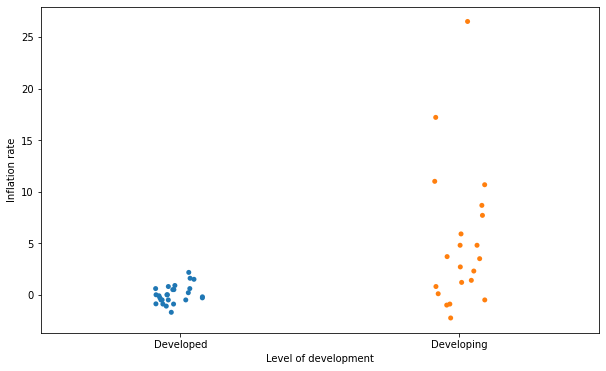

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(x = 'Level of development', y = 'Inflation rate', data = data);

En general, la tasa de inflación en los países en desarrollo es mayor que en los países desarrollados

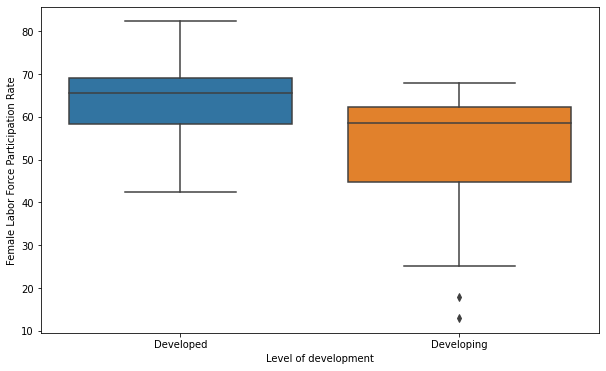

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Level of development', y = 'Female Labor Force Participation Rate', data = data);

Los países desarrollados tienen más participación laboral femenina que los países en desarrollo

### ¿Qué países tienen la tasa de participación femenina más alta en los países desarrollados?

https://www.kaggle.com/shreekant009/women-entrepreneurship-and-labor-force-eda

https://ilostat.ilo.org/es/topics/women/


In [ ]:
data['Delta Index'] = data['Women Entrepreneurship Index'] - data['Entrepreneurship Index']

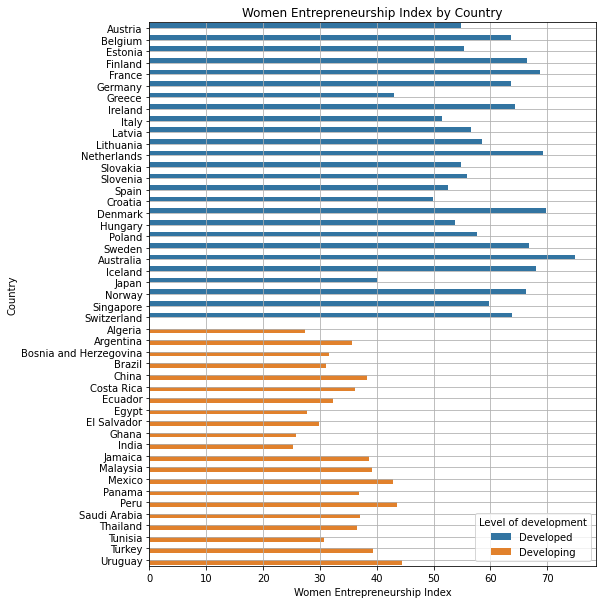

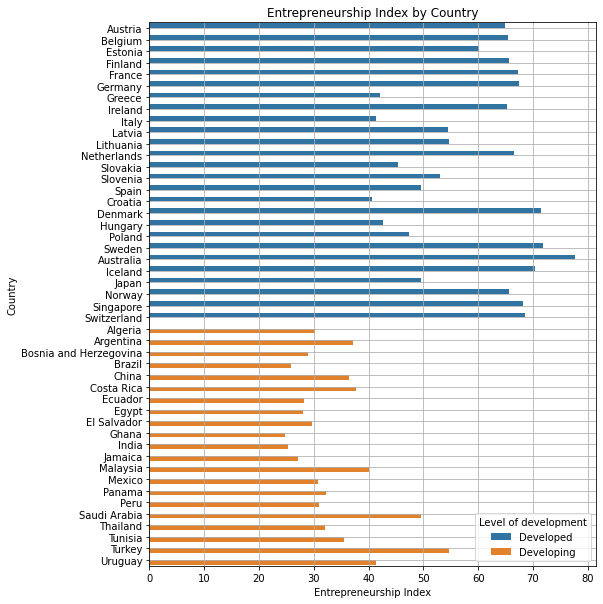

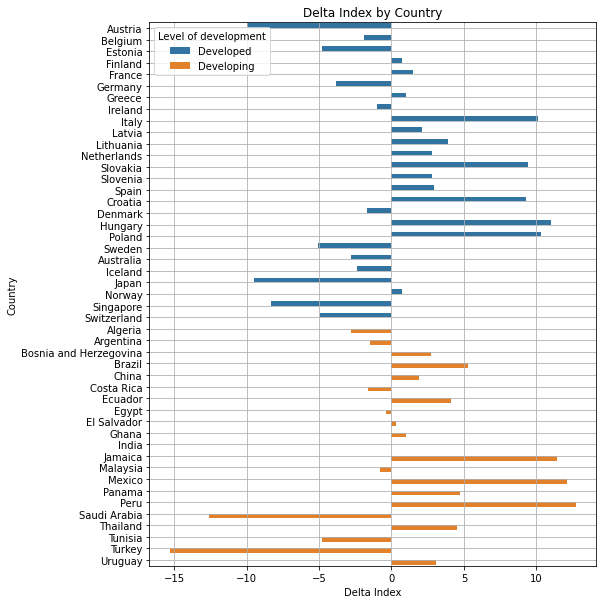

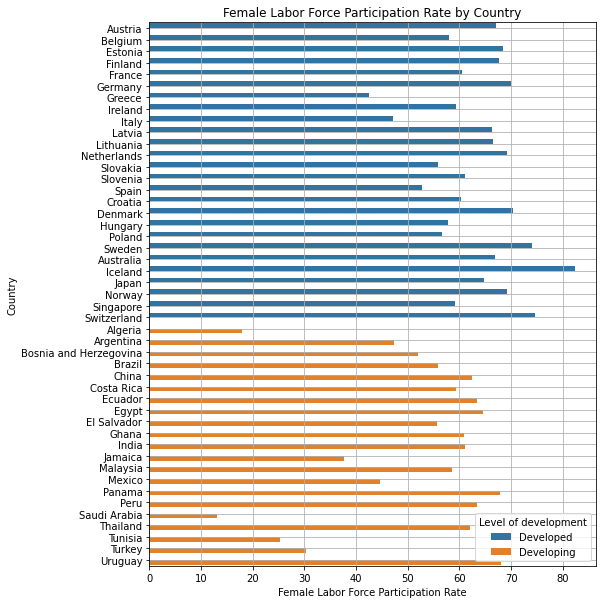

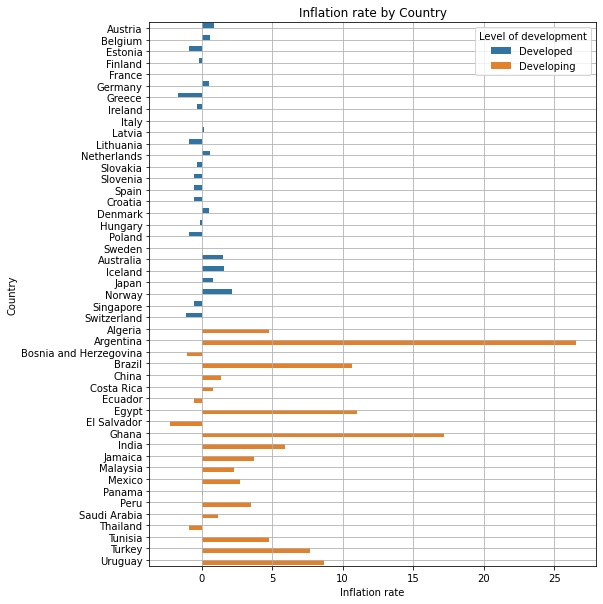

In [ ]:
var_list = ['Women Entrepreneurship Index', 'Entrepreneurship Index', 'Delta Index', 
            'Female Labor Force Participation Rate', 'Inflation rate']
for v in var_list:
    plt.rcParams['figure.figsize']=(8,10)
    sns.barplot(y='Country', x=v, data=data, hue='Level of development')
    plt.title(v+' by Country')
    plt.grid()
    plt.show()